In [1]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive




---



**AFTER THIS POINT YOU CAN START WORKING**

---








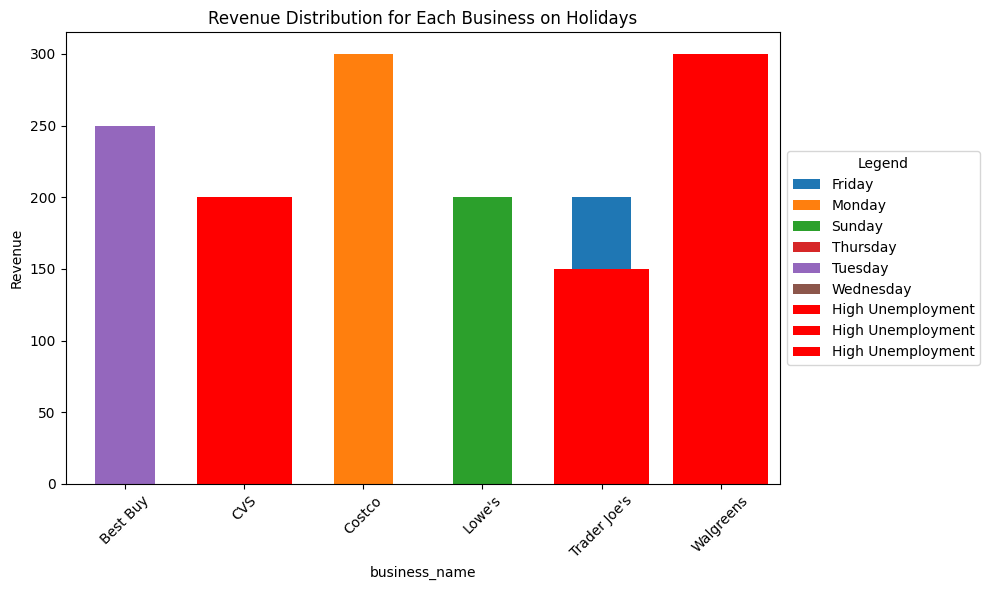

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/gdrive/MyDrive/Datasets/data_34unemployment_rate.csv")

# Filter data for days with holiday flag as TRUE
holiday_data = df[df['holiday_flag'] == True]

# Filter data for days with unemployment rate above 3%
high_unemployment_data = df[df['unemployment_rate'] > 3]

# Group data by business_name and weekday, and calculate the sum of revenue
# .unstack() unstacks the data into a tabular format as a dataframe
grouped_data = holiday_data.groupby(['business_name', 'weekday'])['revenue'].sum().unstack()

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each weekday's revenue as a stacked bar
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Highlight days with high unemployment rate
for day, data in high_unemployment_data.iterrows():
    x = grouped_data.columns.get_loc(data['weekday'])
    ax.bar(x, data['revenue'], color='red', label='High Unemployment')

ax.set_ylabel('Revenue')
ax.set_title('Revenue Distribution for Each Business on Holidays')
ax.set_xticklabels(grouped_data.index, rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')

plt.tight_layout()
plt.show()